# Study of ads for the sale of apartments

At your disposal is the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.
    
__Count and add to table:__
- price per square meter;
- day of the week, month and year of publication of the announcement;
- floor of the apartment; options - first, last, other;
- the ratio of residential and total area, as well as the ratio of kitchen area to total.

__Perform exploratory data analysis and follow the instructions:__
- Study the following parameters: area, price, number of rooms, ceiling height. Plot histograms for each parameter.
- Study the time of sale of the apartment. Plot a histogram. Calculate the mean and median. Describe how long a sale usually takes. When can sales be considered very fast, and when unusually long?
- Remove rare and outliers. Describe what features you found.
- What factors most influence the cost of an apartment? Find out if the price depends on the area, number of rooms, distance from the center. Study the dependence of the price on which floor the apartment is located on: first, last or another. Also study the dependence on the date of placement: day of the week, month and year.
- Select the 10 locations with the most ads. Calculate the average price per square meter in these settlements. Select the settlements with the highest and lowest cost of housing. This data can be found by name in the locality_name column.
- Check the offers of apartments: for each apartment there is information about the distance to the center. Select apartments in St. Petersburg (locality_name). Your task is to find out which area is included in the center. Create a column with the distance to the center in kilometers: round to whole numbers. After that, calculate the average price for each kilometer. Build a graph: it should show how the price depends on the distance from the center. Define the border where the graph changes a lot - this will be the central zone.
- Select a segment of apartments in the center. Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the ad). Draw your own conclusions. Do they differ from the general conclusions throughout the database?

## Examining data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
path ='/Users/vzuga/Documents/jupyter/'
df = pd.read_csv(path+'/datasets/real_estate_data.csv', sep='\t')
df.info()
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.describe(percentiles=[.5])

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
#counting duplicates before changes
duplicates_original = df.duplicated().sum()
duplicates_original

0

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Conclusion
Gaps found in:
* ceiling_height
* floors_total
* living_are
*is_apartment
*is_apartment
*kitchen_area
* balcony
* locality_name
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition

Unusual values ​​in ceilings, number of floors, floor and kitchen size.
Check locality name.

Perhaps you should change the data type:

* first_day_expo in DateTime

* floors_total to int

* is_apart to bool or int

* aeroport_nearest to int

* cityCenters_nearest to int

* parks_around3000, parks_nearest, ponds_around3000, ponds_nearest to int

* days_exposition possible in DateTime?

Rename cityCenters_nearest, parks_around3000 and ponds_around3000.

There are no duplicates.

## Data preprocessing
### Data gaps

#### ceiling_height

I'll start with 'ceiling_height'. I'll look at the minimum values.

In [6]:
df['ceiling_height'].sort_values().head(20)

22590    1.00
5712     1.20
16934    1.75
2572     2.00
19329    2.00
11352    2.00
5850     2.00
19098    2.00
16884    2.00
22960    2.00
552      2.00
20520    2.00
16446    2.00
4212     2.00
12755    2.20
17794    2.25
1582     2.30
5498     2.30
17762    2.30
23498    2.30
Name: ceiling_height, dtype: float64

<AxesSubplot:>

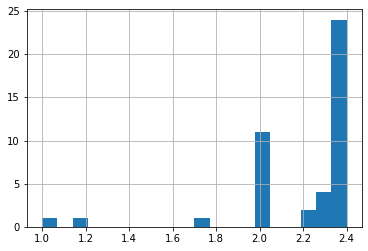

In [7]:
df['ceiling_height'].hist(bins=20, range=(1,2.4))

In [8]:
len(df.query('ceiling_height<2.4'))

21

It can be seen that there are ceilings below 2.4m. According to modern standards, it is impossible to build ceilings below 2.5 m in residential premises, but older buildings come with ceilings of 2.4. I don’t think that everything below 2.4m can be considered residential, and since we have ads for apartments, this is either a mistake in height, or non-residential premises got into the apartments. Since there are not many such apartments, then this is probably some kind of mistake. I will consider these values as outliers.

Let's see how the distribution of the remaining values looks like.

<AxesSubplot:>

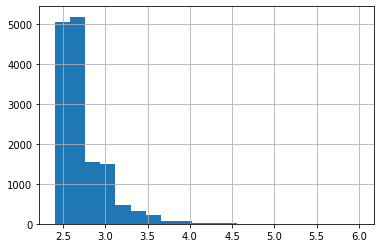

In [9]:
# from 2.4 to 6 meters
df['ceiling_height'].hist(bins=20, range=(2.4, 6))

In [10]:
# up to 22 meters
df[df['ceiling_height']<=22]['ceiling_height'].sort_values().dropna().tail(20)

12401     4.65
19142     4.70
1300      4.70
2802      4.80
21923     4.90
1053      5.00
464       5.20
1026      5.30
12628     5.30
7578      5.50
1388      5.60
21227     5.80
20264     6.00
3474      8.00
17442     8.00
15743     8.00
5863      8.30
22309    10.30
15061    14.00
17496    20.00
Name: ceiling_height, dtype: float64

In [11]:
# up to 100 meters
df[df['ceiling_height']<=100]['ceiling_height'].sort_values().dropna().tail(25)

22309     10.3
15061     14.0
17496     20.0
20507     22.6
5076      24.0
14382     25.0
18545     25.0
9379      25.0
355       25.0
11285     25.0
4643      25.0
6246      25.0
5669      26.0
5246      27.0
5807      27.0
22938     27.0
4876      27.0
21824     27.0
17857     27.0
20478     27.0
10773     27.0
21377     27.5
22336     32.0
3148      32.0
22869    100.0
Name: ceiling_height, dtype: float64

We can draw the following conclusion: most of the apartments have ceilings from 2.4 to 3.5 meters. I read an article about St. Petersburg's housing stock: there are non-standard apartments with high ceilings up to 6 meters, but this is rare. Anything up to 6 meters - I'll keep. 

From 6 to 24 - I will replace it with an average value.

24-32 meters - divided by 10, just fits into most values, it looks like an error in the order of magnitude.

I will also replace a single case of 100 meters with an average.

In [12]:
#24-32 meters
df.loc[
    (df['ceiling_height']>=24)&(df['ceiling_height']<=32), 'ceiling_height'
] = df.query('24<=ceiling_height<=32')['ceiling_height'].apply(lambda x: x/10)

In [13]:
df['ceiling_height'].sort_values().dropna().tail(10)

20264      6.0
15743      8.0
17442      8.0
3474       8.0
5863       8.3
22309     10.3
15061     14.0
17496     20.0
20507     22.6
22869    100.0
Name: ceiling_height, dtype: float64

In [14]:
#from 6 to 24 meters
df.loc[
    (df['ceiling_height']>=6)&(df['ceiling_height']<24), 'ceiling_height'
] = df['ceiling_height'].mean()

In [15]:
df['ceiling_height'].sort_values().dropna().tail()

1026       5.3
7578       5.5
1388       5.6
21227      5.8
22869    100.0
Name: ceiling_height, dtype: float64

In [16]:
df.loc[df['ceiling_height']==100, 'ceiling_height'] = df['ceiling_height'].mean()

<AxesSubplot:>

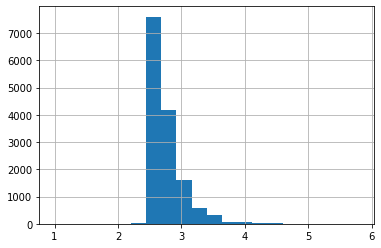

In [17]:
#ceiling height distibution
df['ceiling_height'].sort_values().hist(bins=20)

I'll see what happens if I replace the gaps in 'ceiling_height' with an average value.

In [18]:
df['ceiling_height'].mean()

2.7261961534039156

In [19]:
#df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())

In [20]:
#df['ceiling_height'].isna().sum()

<AxesSubplot:>

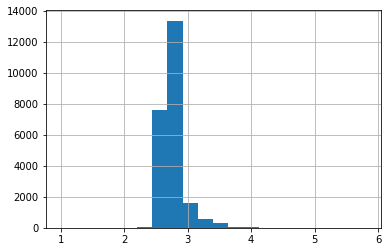

In [21]:
#ceiling height distribution after filling gaps with medium
df['ceiling_height'].fillna(df['ceiling_height'].mean()).hist(bins=20)

In [22]:
df['ceiling_height'].isna().mean()

0.38799105447487237

There are a lot of missing values in the ceiling height - 38%. Filling in these gaps with the mean changes the distribution dramatically. While I won't fill in the missing values, I'll come back to this later in the exploration phase.
#### floors_total
Let's move on to gaps and values in 'floors_total'.

In [23]:
df['floors_total'].isna().sum()

86

In [24]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

An Internet search claims that the tallest residential building in St. Petersburg has 35 floors (I myself was able to find an apartment on the 35th floor for sale, there is no higher). I will replace the average, everything above the 35th floor and gaps, but first I will see how the floor of the apartment correlates with the number of floors in the house, perhaps the floor will be more than the number of floors in the house.

In [25]:
(df['floors_total']-df['floor'] < 0).sum()

0

There are no cases where the floor is greater than the maximum floor in the house.

In [26]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean())

In [27]:
df['floors_total'].isna().sum()

0

In [28]:
df.loc[df['floors_total']>35, 'floors_total'] = df['floors_total'].mean()

In [29]:
#type to int
df['floors_total'] = df['floors_total'].astype(int)

In [30]:
(df['floors_total']-df['floor'] < 0).sum()

38

After replacing the number of floors with the average, it turned out that in 38 cases the floor of the apartment was higher than this average. In this case, I will replace the number of floors with the current floor.

In [31]:
df.loc[df['floors_total']-df['floor'] < 0, 'floors_total'] = df[df['floors_total']-df['floor'] < 0]['floor']

In [32]:
(df['floors_total']-df['floor'] < 0).sum()

0

#### living_area

I'll see how the total area looks like for cases with passes in the living area and without.

<AxesSubplot:>

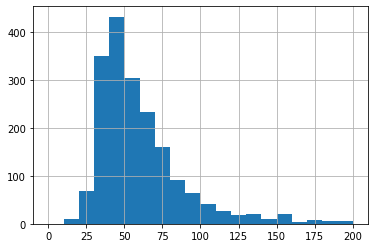

In [33]:
# with gaps in the total area
df[df['living_area'].isna()]['total_area'].hist(bins=20, range=(0,200))

<AxesSubplot:>

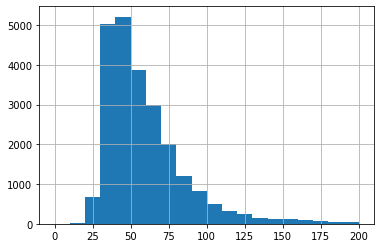

In [34]:
# without gaps in the total area
df['total_area'].hist(bins=20, range=(0,200))

<AxesSubplot:>

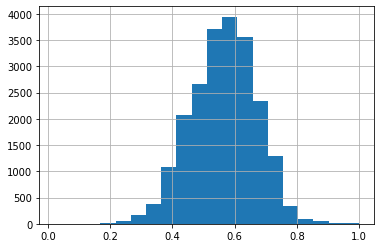

In [35]:
# distribution ratio living/total area
(df['living_area']/df['total_area']).hist(bins=20)

In [36]:
#mean ratio
mean_ratio_area = (df['living_area']/df['total_area']).mean()
mean_ratio_area

0.5647655216993234

It can be seen that the area ratio is normally distributed and is characterized by an average value. I will replace all gaps in the living area with the product of the total area and the average value of the ratio.

In [37]:
df['living_area'] = df['living_area'].fillna(df['total_area']*mean_ratio_area)

In [38]:
df['living_area'].isna().sum()

0

#### is_apartment

In [39]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

This column is not informative, there are too few values, not enough information to fill in the gaps. I will not fill in empty values.

 #### kitchen_area

I'll do the same as for 'living_area'.

In [40]:
df['kitchen_area'].isna().mean()

0.09612219924891345

In [41]:
df[df['kitchen_area']>df['total_area']]['kitchen_area'].count()

0

<AxesSubplot:>

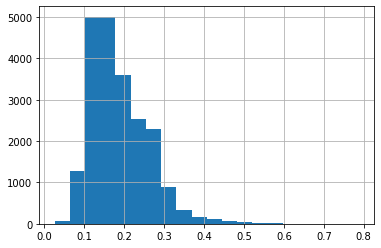

In [42]:
(df['kitchen_area']/df['total_area']).hist(bins=20)

In [43]:
mean_ratio_kitchen = (df['kitchen_area']/df['total_area']).mean()
mean_ratio_kitchen

0.1873547387717406

In [44]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*mean_ratio_kitchen)

In [45]:
df['kitchen_area'].isna().sum()

0

#### balcony

In [46]:
df['balcony'].value_counts().sort_values()

3.0      81
4.0     183
5.0     304
2.0    3659
0.0    3758
1.0    4195
Name: balcony, dtype: int64

In [47]:
#share of omissions
df['balcony'].isna().mean()

0.4860542638929913

In [48]:
#share of apartments without balconies among the data without gaps
len(df.query('balcony==0'))/len(df)/df['balcony'].isna().mean()

0.3262435975345082

<AxesSubplot:>

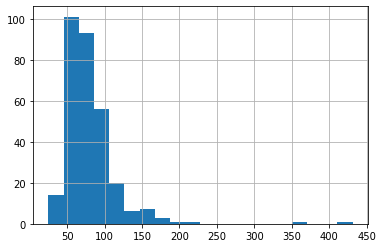

In [49]:
#how are the areas of apartments from 5!!! balconies
df.query('balcony==5')['total_area'].hist(bins=20)

Almost every second apartment does not contain information about balconies. Among the completed values, there are no balconies in 32% of the apartments. I will not fill in the gaps with zeros, because most likely only in every third apartment there are no balconies in the passes. I am also embarrassed by apartments with an area of ​​less than 50 sq.m. with 5 balconies, I think it's unlikely. For further analysis, I categorize data on balconies into: there is a balcony, there is no balcony.

In [50]:
df['balcony_presence'] = df['balcony'].dropna().apply(lambda x: x>=1)

In [51]:
df[['balcony_presence', 'balcony']].head()

,balcony_presence,balcony
0,NaN,NaN
1,True,2.0
2,False,0.0
3,False,0.0
4,NaN,NaN


#### locality_name

At first, I skipped the values in this column and decided that everything was fine there. But at the research stage, I discovered different forms of recording settlements. I will delete all villages, towns in names and so on. First, I'll check the gaps.

In [52]:
df['locality_name'].isna().sum()

49

In [53]:
df[df['locality_name'].isna()]['cityCenters_nearest'].value_counts()

17369.0    8
4258.0     2
12332.0    2
8943.0     2
4065.0     1
4474.0     1
4805.0     1
3312.0     1
1780.0     1
8429.0     1
4383.0     1
8127.0     1
31813.0    1
9497.0     1
3902.0     1
4604.0     1
16788.0    1
10976.0    1
1322.0     1
4069.0     1
8582.0     1
9538.0     1
41294.0    1
5382.0     1
3801.0     1
31897.0    1
8619.0     1
23659.0    1
3039.0     1
9633.0     1
4627.0     1
Name: cityCenters_nearest, dtype: int64

There are 49 passes in total. I'll fill it in with St. Petersburg. The distance to the center fits into the size of St. Petersburg.

In [54]:
df['locality_name'].fillna('Санкт-Петербург', inplace=True)

In [55]:
df['locality_name'].isna().sum()

0

I will start looking for towns and villages. First, find the lines with spaces.

In [56]:
df[df['locality_name'].str.contains(' ')]['locality_name'].unique()

array(['посёлок Шушары', 'городской посёлок Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'деревня Кудрово',
       'поселок городского типа Красный Бор', 'поселок Мурино',
       'деревня Фёдоровское', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'село Путилово',
       'Сосновый Бор', 'поселок Новый Свет', 'деревня Оржицы',
       'деревня Кальтино', 'поселок Романовка', 'посёлок Бугры',
       'поселок Бугры', 'поселок городского типа Рощино', 'село Павлово',
     

I'll do it in several passes. In the first lines I see that there is a "village", "town" and "settlement" and others. I'll delete them and see what happens.

In [57]:
df['locality_name'] = df['locality_name'].str.replace('поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('посёлок ', '')
df['locality_name'] = df['locality_name'].str.replace('деревня ', '')
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace('городского типа ', '')
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace('село ', '')

In [58]:
df['locality_name'].value_counts()

Санкт-Петербург    15770
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Нижняя                 1
Ялгино                 1
Гончарово              1
Снегирёвка             1
Свирьстрой             1
Name: locality_name, Length: 311, dtype: int64

It can be seen that the names begin with a capital letter, and everything else with a small one. With the help of istitle() I will write these values in a separate column.

In [59]:
df['loc_temp'] = df[df['locality_name'].str.istitle()]['locality_name']

In [60]:
df[df['loc_temp'].isna()]['locality_name'].value_counts()

имени Свердлова                                            36
имени Морозова                                             17
станции Вещево                                              4
станции Громово                                             3
станции Свирь                                               2
станции Приветнинское                                       2
коттеджный Счастье                                          1
Платформа 69-й километр                                     1
станции Корнево                                             1
коттеджный Лесное                                           1
садовое товарищество Приладожский                           1
при железнодорожной станции Вещево                          1
садовое товарищество Новая Ропша                            1
садовое товарищество Рахья                                  1
садовое товарищество Садко                                  1
коттеджный Кивеннапа Север                                  1
станции 

Looks better.

In [61]:
df['locality_name'] = df['locality_name'].str.replace('имени ', '')
df['locality_name'] = df['locality_name'].str.replace('станции ', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной ', '')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')

I'll check the lines with spaces again.

In [62]:
df[df['locality_name'].str.contains(' ')]['locality_name'].unique()

array(['Красный Бор', 'Новое Девяткино', 'Новая Ропша', 'Красное Село',
       'Новый Свет', 'Сосновый Бор', 'Большая Ижора', 'Большие Колпаны',
       'Новая Ладога', 'Малое Карлино', 'Малое Верево', 'Чудской Бор',
       'Лодейное Поле', 'Малые Колпаны', 'Старая Малукса',
       'Старые Бегуницы', 'Старая Ладога', 'Старое Хинколово',
       'Красная Долина', 'Дружная Горка', 'Лисий Нос', 'Лесная Поляна',
       'Новый Учхоз', 'Платформа 69-й километр', 'Форт Красная Горка',
       'Старая Пустошь', 'Большая Вруда', 'Нижние Осельки',
       'Большая Пустомержа', 'Вахнова Кара', 'Кивеннапа Север',
       'Трубников Бор', 'Пансионат Зелёный Бор', 'Большой Сабск',
       'Большое Рейзино', 'Малая Романовка', 'Борисова Грива'],
      dtype=object)

Use istitle() again.

In [63]:
df['loc_temp'] = df[df['locality_name'].str.istitle()]['locality_name']
df[df['loc_temp'].isna()]['locality_name'].value_counts()

Платформа 69-й километр    1
Name: locality_name, dtype: int64

There is one value left that does not meet the istitle criteria. Surprisingly, this is not a mistake, such a village really exists.

Delete loc_temp.

In [64]:
df = df.drop('loc_temp', 1)

#### Geography

In [65]:
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [66]:
df[df['parks_nearest'].notna()]['parks_around3000'].value_counts()

1.0    5681
2.0    1747
3.0     647
0.0       4
Name: parks_around3000, dtype: int64

In [67]:
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [68]:
df[df['ponds_nearest'].notna()]['ponds_around3000'].value_counts()

1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [69]:
df['cityCenters_nearest'].isna().mean()

0.23287902443141062

Approximately 80% of ads have information about the distance to the center, about parks and ponds and airports. The number of values in ponds_nearest and parks_nearest is less than in ponds_around3000 and parks_around3000 and this is due to the fact that information is only available for cases where ponds_around3000 and parks_around3000 are non-zero. I don't have the information to fill in the gaps in all of these columns.

### Duplicates

In [70]:
df.duplicated().sum()

0

### Rename

I will rename the distance to the center and parks with ponds.

In [71]:
df.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest', 'ponds_around3000': 'ponds_around_3000', 
    'parks_around3000': 'parks_around_3000'
}, inplace=True)

In [72]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'balcony_presence'],
      dtype='object')

### Conclusion
The file has been opened and studied. Missing values are replaced where possible. I changed the data type to int in 'floors_total', the other columns have missing values, I can't replace them with zero, and I can't convert to int with missing values. There are capitals with the time of announcements and the number of days left, I will deal with them in the next section. Initial duplicates were not found, after corrections there are no duplicates either.

## Calculations and adding results to the table
### Price per square meter

In [73]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,balcony_presence
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.600000,1,NaN,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,True
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.300000,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,89.797718,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,NaN


In [74]:
df.insert(loc=3, column='m2_price', value=df['last_price']/df['total_area'])

In [75]:
#to int
df['m2_price'] = df['m2_price'].astype(int)

In [76]:
df.head()

,total_images,last_price,total_area,m2_price,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,balcony_presence
0,20,13000000.0,108.0,120370,2019-03-07T00:00:00,3,2.70,16,51.000000,8,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,NaN
1,7,3350000.0,40.4,82920,2018-12-04T00:00:00,1,NaN,11,18.600000,1,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,True
2,10,5196000.0,56.0,92785,2015-08-20T00:00:00,2,NaN,5,34.300000,4,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,False
3,0,64900000.0,159.0,408176,2015-07-24T00:00:00,3,NaN,14,89.797718,9,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,False
4,2,10000000.0,100.0,100000,2018-06-19T00:00:00,2,3.03,14,32.000000,13,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,NaN


### Day of the week, month and year of publication of the ad

In [77]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [78]:
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [79]:
df['exposition_day'] = pd.DatetimeIndex(df['first_day_exposition']).day_name()
df['exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month_name()
df['exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [80]:
df[['exposition_day', 'exposition_month', 'exposition_year']].head()

,exposition_day,exposition_month,exposition_year
0,Thursday,March,2019
1,Tuesday,December,2018
2,Thursday,August,2015
3,Friday,July,2015
4,Tuesday,June,2018


### Apartment floor

In [81]:
#function to categorize floors
def floor_cat(row):
    if row['floor']==1:
        return 'first'
    if row['floor']==row['floors_total']:
        return 'last'
    return 'other'

In [82]:
df['floor_category'] = df.apply(floor_cat, axis=1)

In [83]:
df[['floor', 'floors_total', 'floor_category']].head()

,floor,floors_total,floor_category
0,8,16,other
1,1,11,first
2,4,5,other
3,9,14,other
4,13,14,other


In [152]:
df.query('floor_category=="last"')[['floor', 'floors_total', 'floor_category']]. head()

,floor,floors_total,floor_category
12,5,5,last
13,5,5,last
23,9,9,last
36,9,9,last
43,4,4,last


### Ratio of residential and total area

In [85]:
df['ratio_area'] = df['living_area']/df['total_area']

In [86]:
df[['ratio_area','living_area', 'total_area']].head()

,ratio_area,living_area,total_area
0,0.472222,51.000000,108.0
1,0.460396,18.600000,40.4
2,0.612500,34.300000,56.0
3,0.564766,89.797718,159.0
4,0.320000,32.000000,100.0


### Ratio of kitchen area to total

In [87]:
df['ratio_kitchen'] = df['kitchen_area']/df['total_area']

In [88]:
df[['ratio_kitchen','kitchen_area', 'total_area']].head()

,ratio_kitchen,kitchen_area,total_area
0,0.231481,25.000000,108.0
1,0.272277,11.000000,40.4
2,0.148214,8.300000,56.0
3,0.187355,29.789403,159.0
4,0.410000,41.000000,100.0


## Exploratory data analysis
### Area

In [89]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

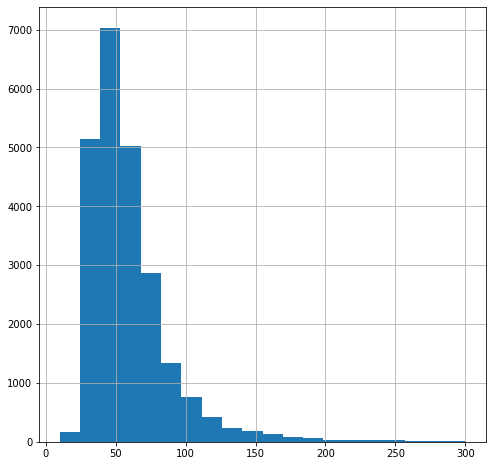

In [90]:
#distribution area up to 300 sq.m.
df['total_area'].hist(bins=20, range=(10,300), figsize=(8,8))

<AxesSubplot:>

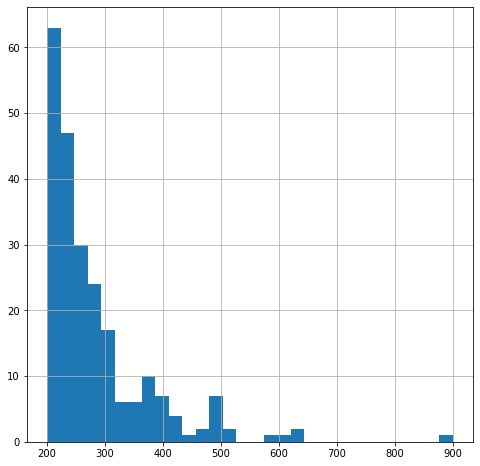

In [91]:
#distribution area from 200 sq.m.
df['total_area'].hist(bins=30, range=(200,900), figsize=(8,8))

#### Conclusion
The average value of the area is 60 sq.m., and the maximum is 900 sq.m.

To check, I decided to go to the real estate website and see for myself the apartments in St. Petersburg and their areas.
After about 550 sq.m. garbage begins, apartments with an area of 500 sq.m. meet, but these are single offers of luxury real estate. Anything more is usually a mistake.
### Price

In [92]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

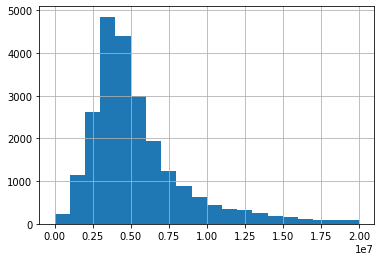

In [93]:
df['last_price'].hist(bins=20, range=(0, 2e7))

Since apartments come in different sizes and the tail of the price distribution is large, but more relevant is the price per square meter. I'll look at her.

In [94]:
df.groupby('exposition_year')['m2_price'].agg(['mean', 'median', 'count'])

,mean,median,count
exposition_year,,,
2014,124830.000000,107000.0,137
2015,104613.756507,93414.0,1191
2016,98321.900467,91743.0,2783
2017,97621.434188,92564.5,8190
2018,97773.107290,95689.0,8519
2019,107123.332060,103305.0,2879


The average price per square meter in St. Petersburg (I looked on the Internet) corresponds to the average price obtained from the data, except for 2014, the price is too high in the data, but there are few ads (an order of magnitude less than in other years), judging by the median, expensive ones got there apartments.

In [95]:
df['m2_price'].describe()

count    2.369900e+04
mean     9.942121e+04
std      5.030681e+04
min      1.110000e+02
25%      7.658500e+04
50%      9.500000e+04
75%      1.142560e+05
max      1.907500e+06
Name: m2_price, dtype: float64

<AxesSubplot:>

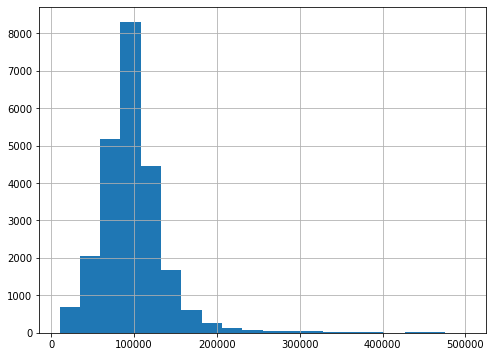

In [96]:
#distribution of prices per sq.m. in the range from 10000 to 500000
df['m2_price'].hist(range=(1e4, 5e5), bins=20, figsize=(8,6))

<AxesSubplot:>

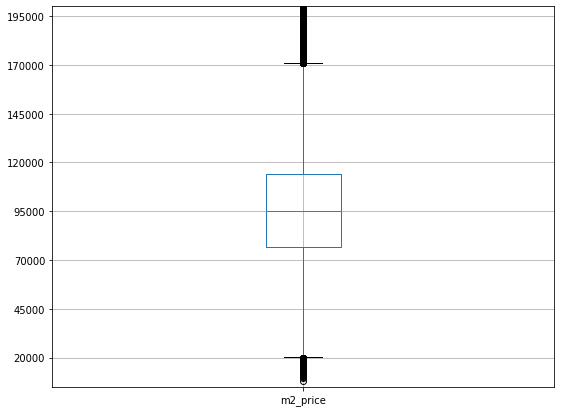

In [97]:
ticks = range(20000, 250000, 25000)
df['m2_price'].plot(kind='box', figsize=(9,7), grid=True, ylim=(5000, 2e5), yticks = ticks)

<AxesSubplot:>

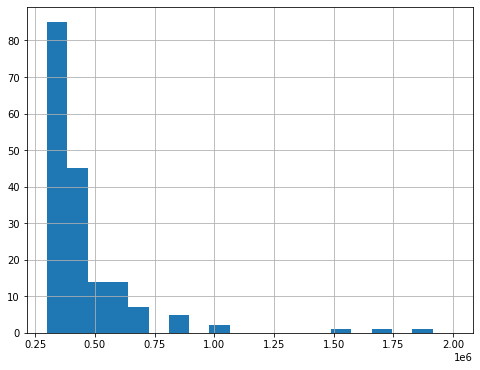

In [98]:
#distribution of prices per sq.m. in the range from 300000 to 2000000
df['m2_price'].hist(range=(3e5, 2e6), bins=20, figsize=(8,6))

#### Conclusion
Distribution of prices per sq.m. looks like normal with a big tail in the high price area. Average price per sq.m. in 2014-2019 was about 100 thousand. I will take the lower price limit from the swing chart (20 thousand). I will take the upper limit of 750 thousand, the histogram above shows that after 750 thousand there are already single values. At the moment, the maximum price per square that I could find is 1.5 million, but in 2020 prices have risen exactly 2 times, so I think 750 thousand is a realistic estimate.

### Number of rooms

In [99]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [100]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

I'll check the zero rooms, maybe they're studios.

In [101]:
df.query('rooms==0')['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

And studios and mistakes.

Most of the apartments are standard, 1-3 rooms, but there are also single values where there are more than 10 rooms. I'll see what the area of these apartments is, taking into account the fact that I decided to consider the area more than 550 sq.m. emissions.

In [102]:
df.query('rooms>=10 and total_area<550')['total_area'].describe()

count      9.000000
mean     267.722222
std       67.702562
min      183.700000
25%      216.100000
50%      270.000000
75%      290.000000
max      374.600000
Name: total_area, dtype: float64

In general, I do not see any problems in arranging 10 rooms in an apartment of 300 sq.m. in isolated cases.

<AxesSubplot:>

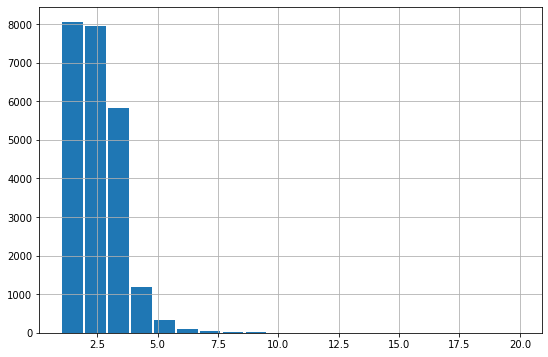

In [103]:
df['rooms'].hist(range=(1, 20), bins=20, rwidth=0.9, figsize=(9,6))

#### Conclusion
Most apartments have one to four rooms. I will consider the number of rooms more than 10 outliers.

### Ceiling height

In [104]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.726196
std          0.277962
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

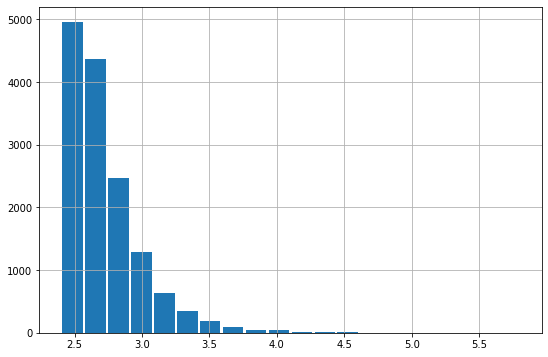

In [105]:
df['ceiling_height'].hist(range=(2.4, 5.8), bins=20, figsize=(9,6), rwidth=0.9)

I have already replaced the values in the ceilings and did not fill in half the gaps. Here's what the distribution looks like when you fill in the gaps with the average:

<AxesSubplot:>

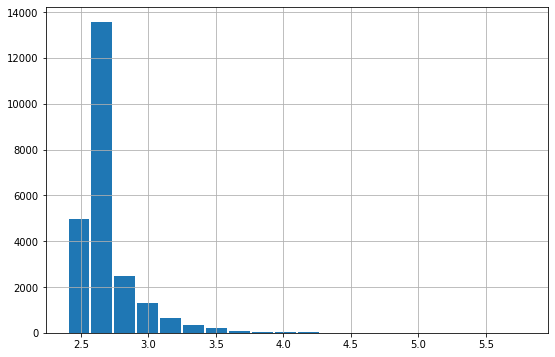

In [106]:
df['ceiling_height'].fillna(df['ceiling_height'].mean()).hist(
    range=(2.4, 5.8), bins=20, figsize=(9,6), rwidth=0.9
)

I still don't think it's worth filling in those gaps.
#### Conclusion
There are many gaps in the ceiling height. The average height is about 2.7 meters.
### Apartment sale time
*Study the time of sale of the apartment. Plot a histogram. Calculate the mean and median. Describe how long a sale usually takes. When can sales be considered very fast, and when is it unusually long?*

In [107]:
df['days_exposition'].isna().mean()

0.13422507278788134

In [108]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

13% missed sales time. The mean time is 180 days and the median is 95.

<AxesSubplot:>

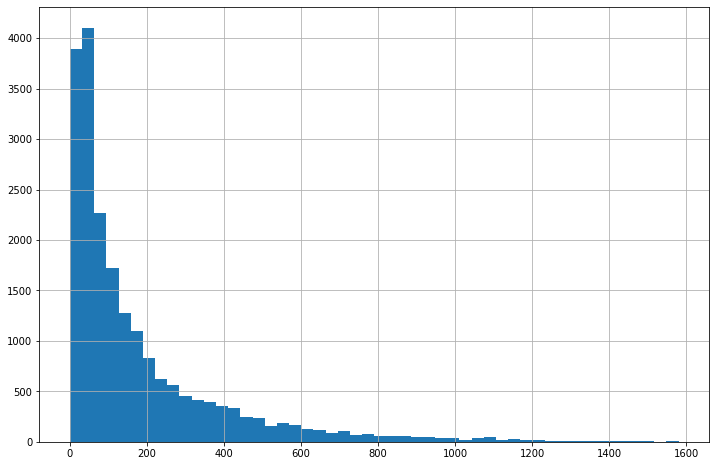

In [109]:
df['days_exposition'].hist(figsize=(12,8), bins=50)

It usually takes 95 days to sell an apartment. To identify very fast and unusually long sales, I will build a swing chart.

<AxesSubplot:>

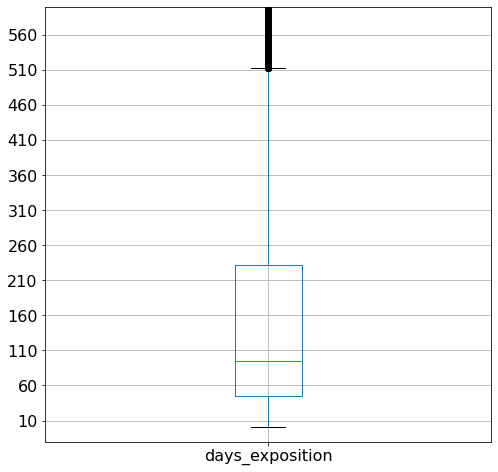

In [110]:
ticks = range(10, 610, 50)
df.plot(
    y='days_exposition', kind='box', figsize=(8,8), ylim=(-20, 600), grid=True, yticks=ticks,
    fontsize=16
)

The normal time to sell is in the 2nd and 3rd quartiles, ranging from 45 to 232 days. Fast sales - up to 45 days, very fast - up to 10 days. Long sales - from 232 days, very long - from 510. I'll see if something affects the sale time, for example, the price.

<AxesSubplot:xlabel='m2_price', ylabel='days_exposition'>

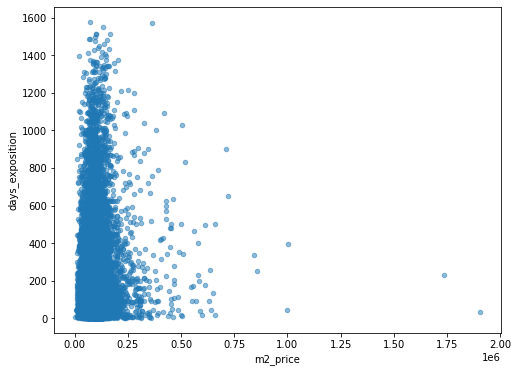

In [111]:
df.plot(kind='scatter', x='m2_price', y='days_exposition', figsize=(8,6), alpha=0.5)

Doesn't affect price. I'll check the rest of the settings.

In [112]:
df.corr()['days_exposition']

total_images           -0.026657
last_price              0.081146
total_area              0.149675
m2_price                0.048120
rooms                   0.126961
ceiling_height          0.131462
floors_total           -0.052067
living_area             0.144000
floor                  -0.039463
studio                 -0.022476
open_plan              -0.024112
kitchen_area            0.111381
balcony                -0.032909
airports_nearest       -0.018271
city_centers_nearest   -0.060714
parks_around_3000       0.060491
parks_nearest           0.023254
ponds_around_3000       0.073162
ponds_nearest          -0.077879
days_exposition         1.000000
exposition_year        -0.611308
ratio_area              0.011541
ratio_kitchen          -0.041340
Name: days_exposition, dtype: float64

The sale time slightly correlates with the year of the announcement, the smaller the year, the longer the sale time, but this relationship is obvious - older announcements have been hanging longer.
#### Conclusion
Most apartments are sold within 45 to 232 days.
### Rare and outlier values
*Remove rare and outlier values. Describe what features you found.*
I'll build range charts and see what happens if we discard outliers in the chart.

<AxesSubplot:>

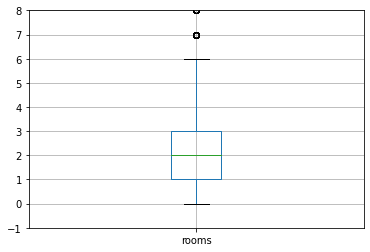

In [113]:
df['rooms'].plot(kind='box', grid=True, ylim=(-1,8))

<AxesSubplot:>

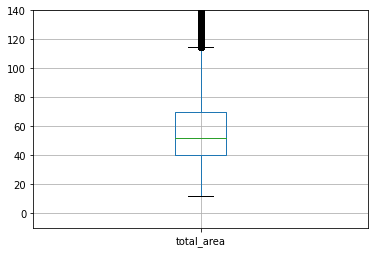

In [114]:
df['total_area'].plot(kind='box', grid=True, ylim=(-10, 140))

<AxesSubplot:>

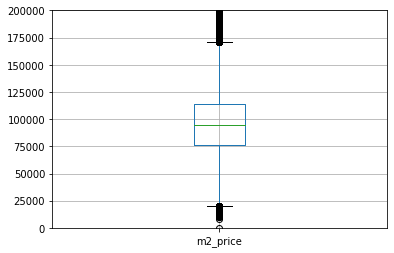

In [115]:
df['m2_price'].plot(kind='box', grid=True, ylim=(0, 2e5))

<AxesSubplot:>

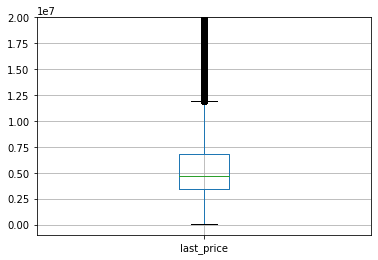

In [116]:
df['last_price'].plot(kind='box', grid=True, ylim=(-1e6, 2e7))

In [117]:
df.query(
'10<days_exposition<510 and rooms<7 and ceiling_height<3.3 and total_area<120 and 25000<m2_price<175000 and last_price<1.25e7'
).shape[0]


9048

Only 40% of the original data remained. I think it's too rough.

I will try to clean up the emissions based on the estimates obtained at the analysis stage: the area is less than 550 sq.m., the price per square is from 20 to 750 thousand, the number of rooms is less than 10, the ceilings are from 2.4m.

In [118]:
len(df)

23699

I will remove these outliers from df.

In [119]:
df = df.query('total_area<=550 and 20000<=m2_price<=750000 and rooms<=10')

In [120]:
#due to omissions in the height of the ceilings, I can not add to the query above ceiling_height> 2.4
df = df.drop(df.query('ceiling_height<2.4').index)

In [121]:
len(df)

23488

#### Conclusion
Removed outliers.
### The cost of the apartment
*What factors most influence the price of an apartment? Find out if the price depends on the square meter, number of rooms, floor (first or last), distance from the center. Also study the dependence on the date of placement: day of the week, month and year. "Choose the 10 locations with the most listings. Calculate the average price per square meter in those locations. Highlight the cities with the highest and lowest housing costs. This data can be found by name in the '*locality_name'* column.*

In [122]:
df.corr().loc[
    ['m2_price', 'total_area', 'rooms', 'floors_total', 'city_centers_nearest'],['last_price','m2_price']]

,last_price,m2_price
m2_price,0.726860,1.000000
total_area,0.739613,0.293144
rooms,0.433254,0.043959
floors_total,-0.010916,0.161911
city_centers_nearest,-0.263119,-0.355404


array([[<AxesSubplot:xlabel='m2_price', ylabel='m2_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='m2_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='m2_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='m2_price'>,
        <AxesSubplot:xlabel='floors_total', ylabel='m2_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='m2_price'>],
       [<AxesSubplot:xlabel='m2_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='floors_total', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='m2_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabe

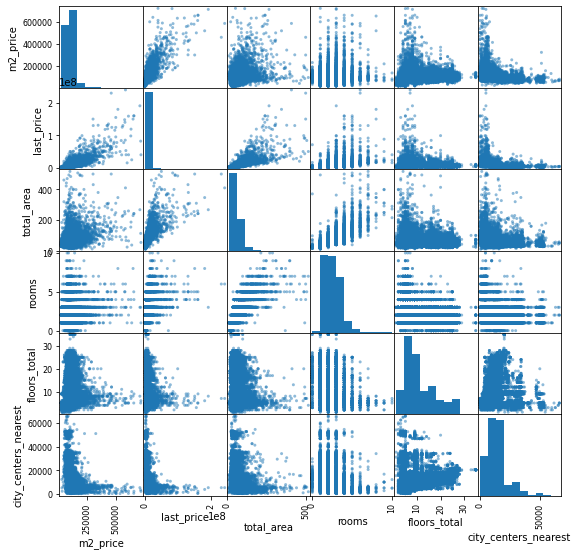

In [123]:
pd.plotting.scatter_matrix(
    df[['m2_price','last_price', 'total_area', 'rooms', 'floors_total', 'city_centers_nearest']], figsize=(9, 9)
)

The cost of the apartment depends on the cost per square meter and area. There is a slight negative correlation between the cost of sq.m. and distance to the center.

There is a connection between the number of rooms and the price, since the rooms are related to the area. Below you can see that the number of rooms is related to the area (obviously).

In [124]:
df.corr().loc['rooms', 'total_area']

0.7621154504284355

In [125]:
df.groupby('rooms')['last_price', 'm2_price', 'total_area'].mean().reset_index()

,rooms,last_price,m2_price,total_area
0,0,3.337724e+06,108512.730964,29.279746
1,1,3.845314e+06,101046.075625,37.644040
2,2,5.603135e+06,96085.382746,55.908768
3,3,8.151487e+06,97399.918637,77.849751
4,4,1.337036e+07,109898.011915,107.665106
5,5,2.272969e+07,124736.916409,161.013901
6,6,2.965888e+07,133825.807692,200.728365
7,7,3.079517e+07,123890.818182,243.163636
8,8,5.022417e+07,184650.583333,259.233333
9,9,3.415236e+07,105026.875000,305.975000


The price increases with the growth of the number of rooms and area. At the same time, the average price per square meter falls with the growth of area and rooms. A square meter in the studio and odnushka comes out more expensive.

In [126]:
df.groupby('floor_category')['last_price', 'm2_price'].mean().reset_index()

,floor_category,last_price,m2_price
0,first,4.838199e+06,83048.872944
1,last,6.809368e+06,93348.280845
2,other,6.625732e+06,103482.727246


<AxesSubplot:xlabel='floor_category'>

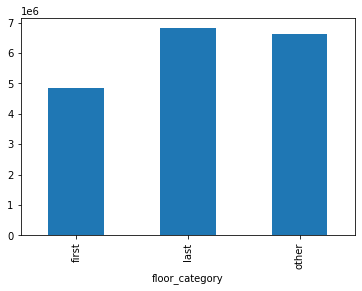

In [127]:
df.groupby('floor_category')['last_price'].mean().plot(kind='bar')

On the first floor are the cheapest apartments. On the top floor, a square meter is cheaper, but the apartments themselves are slightly
expensive.

In [128]:
df.groupby('exposition_day')['last_price'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)

,mean,median,count
exposition_day,,,
Thursday,6.679397e+06,4680000.0,4254
Wednesday,6.484919e+06,4700000.0,3941
Friday,6.407759e+06,4600000.0,3974
Monday,6.386794e+06,4650000.0,3585
Saturday,6.364453e+06,4600000.0,1905
Sunday,6.297457e+06,4555000.0,1679
Tuesday,6.288420e+06,4750000.0,4150


The most expensive apartments go on sale in the middle of the week. Fewer announcements appear on weekends. Sunday prices are the lowest.

In [129]:
df.groupby('exposition_month')['last_price'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)

,mean,median,count
exposition_month,,,
July,6.703059e+06,4690000.0,1676
January,6.700944e+06,4600000.0,1491
May,6.649212e+06,4550000.0,1263
December,6.620488e+06,4700000.0,1623
November,6.499589e+06,4700000.0,2355
September,6.486169e+06,4700000.0,1965
April,6.412632e+06,4800000.0,2358
August,6.401144e+06,4600000.0,1728
June,6.348245e+06,4450000.0,1741


Most apartments are put up for sale from February to March. Prices fluctuate from month to month, but I don’t see any pattern.

In [130]:
df.groupby('exposition_year')['last_price'].agg(['mean','median','count']).sort_values(by='mean', ascending=False)

,mean,median,count
exposition_year,,,
2014,1.208714e+07,7700000.0,137
2015,8.575952e+06,5350000.0,1187
2016,6.719482e+06,4550000.0,2760
2019,6.555790e+06,5100000.0,2848
2017,6.376977e+06,4500000.0,8131
2018,5.961249e+06,4600000.0,8425


In 2014 and 2015, the cost of apartments is higher, but this is explained by less data for these years. The median cost in 2016-2018 is about the same. apart from 2019, there is an increase in prices, perhaps this is the beginning of a 2x price jump that happened in 2020.
I will look at the average price of square meters in settlements.

In [131]:
pv_locality = df.pivot_table(index='locality_name',  values='m2_price', aggfunc=('mean','count'))

In [132]:
pv_locality = pv_locality.sort_values(by='mean', ascending=False)
pv_locality.head(10)

,count,mean
locality_name,,
Зеленогорск,24.0,115122.500000
Санкт-Петербург,15739.0,114112.602770
Бор,1.0,105539.000000
Репино,4.0,104238.500000
Пушкин,369.0,103125.373984
Сестрорецк,183.0,101757.163934
Лисий Нос,3.0,100660.333333
Мистолово,11.0,98549.545455
Левашово,1.0,96997.000000


The top ten high prices were single ads. I will choose 10 settlements with the largest number of advertisements.

In [133]:
pv_locality['count'].sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург    15739.0
Мурино               590.0
Кудрово              471.0
Шушары               440.0
Всеволожск           397.0
Пушкин               369.0
Колпино              338.0
Парголово            327.0
Гатчина              304.0
Выборг               234.0
Name: count, dtype: float64

I'll take a look at their prices.

In [134]:
pv_locality.query('count>235').head(10)

,count,mean
locality_name,,
Санкт-Петербург,15739.0,114112.602770
Пушкин,369.0,103125.373984
Кудрово,471.0,95325.726115
Парголово,327.0,90175.489297
Мурино,590.0,86087.055932
Шушары,440.0,78676.904545
Колпино,338.0,75424.150888
Гатчина,304.0,69294.148026
Всеволожск,397.0,68718.853904


The most expensive apartments are in St. Petersburg, and the cheapest in Vyborg.
### Distance to center
*Check out the offers of apartments: for each apartment there is information about the distance to the center. Select apartments in St. Petersburg (*'locality_name'*). Your task is to find out which area is included in the center. Create a column with the distance to the center in kilometers: round to whole numbers. After that, calculate the average price for each kilometer. Build a graph: it should show how the price depends on the distance from the center. Determine the boundary where the graph changes a lot - this will be the central zone.*

In [135]:
df_spb = df.query('locality_name=="Санкт-Петербург"')
df_spb['city_centers_nearest'].isna().sum()

69

I will remove the data with gaps in the distance to convert to integer values and kilometers.

In [136]:
len(df_spb)

15739

In [137]:
df_spb = df_spb.dropna(subset=['city_centers_nearest'])
df_spb['city_centers_nearest'] = df_spb['city_centers_nearest']/1000
df_spb['city_centers_nearest'] = df_spb['city_centers_nearest'].astype(int)

In [138]:
len(df_spb)

15670

In [139]:
df_spb['city_centers_nearest'].value_counts()

12    1517
14    1510
11    1414
13    1402
15    1373
16    1107
10     913
4      909
5      767
9      692
8      676
17     542
3      527
6      469
7      403
2      305
1      236
21     195
18     174
22     139
0       86
20      83
19      82
25      75
23      31
24      22
28      10
26       3
29       3
27       2
31       2
41       1
Name: city_centers_nearest, dtype: int64

<AxesSubplot:xlabel='city_centers_nearest'>

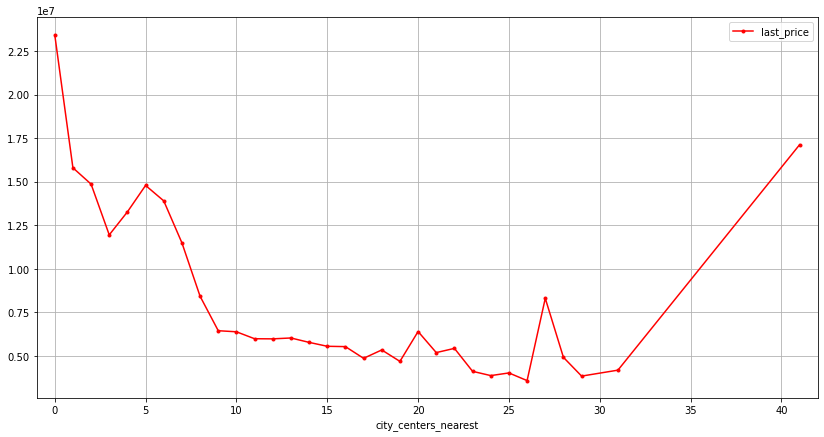

In [140]:
tick=range(0, 45, 5)
df_spb.groupby('city_centers_nearest')['last_price'].mean().reset_index().plot(
    style='.-', x='city_centers_nearest', y='last_price', grid=True, color='red',
    figsize=(14,7), xlim=(-1, 42), xticks=tick, 
)

After 9 km, the shape of the graph changes. We will consider everything that is less than 10 km as the center.

In [141]:
df_spb_center = df_spb.query('city_centers_nearest<10')

### Apartments in the center of the city
*Select a segment of apartments in the center. Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the ad). Draw your own conclusions. Do they differ from the general findings throughout the city?*

In [142]:
#parameters in the center
center_stat = pd.DataFrame(
    np.array([[df_spb_center['total_area'].mean(), df['total_area'].mean()], 
              [df_spb_center['last_price'].mean(), df['last_price'].mean()], 
              [df_spb_center['rooms'].mean(), df['rooms'].mean()], 
              [df_spb_center['ceiling_height'].mean(), df['ceiling_height'].mean()]]), 
    columns=['center', 'all'], 
    index=['area', 'price', 'rooms', 'ceiling'])

In [143]:
center_stat

,center,all
area,8.324779e+01,6.016690e+01
price,1.208324e+07,6.434220e+06
rooms,2.604142e+00,2.064714e+00
ceiling,2.996451e+00,2.726851e+00


<AxesSubplot:>

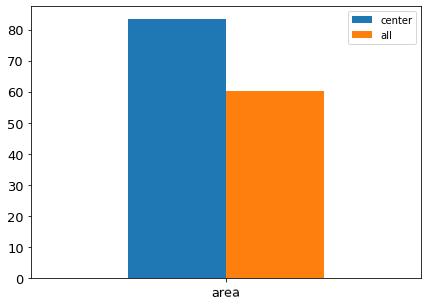

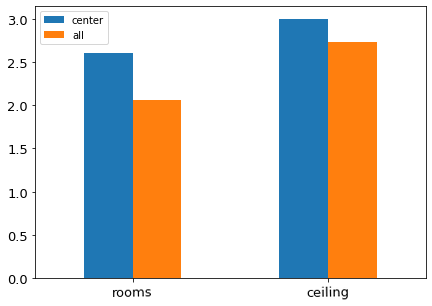

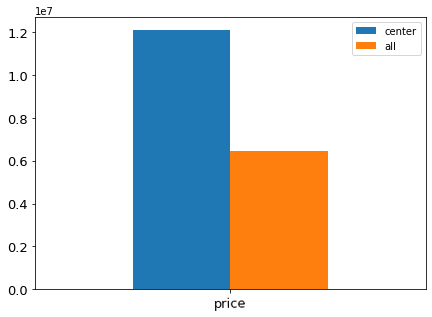

In [144]:
center_stat.iloc[[0]].plot(kind='bar', figsize=(7,5), rot=1, fontsize=13)
center_stat.iloc[[2,3]].plot(kind='bar', figsize=(7,5), rot=1, fontsize=13)
center_stat.iloc[[1]].plot(kind='bar', figsize=(7,5), rot=1, fontsize=13)

The average area of apartments is 25% higher in the center. The number of rooms and ceilings are higher in the center. The average price is 2 times more.

I will look at the relationship between price and other parameters in the center and in the general data.

In [145]:
#center
df_spb_center.corr().loc[
    ['m2_price', 'total_area', 'rooms', 'floors_total', 'city_centers_nearest'],['last_price']]

,last_price
m2_price,0.753449
total_area,0.727897
rooms,0.422977
floors_total,-0.014375
city_centers_nearest,-0.190775


In [146]:
#the rest
df.corr().loc[
    ['m2_price', 'total_area', 'rooms', 'floors_total', 'city_centers_nearest'],['last_price']]

,last_price
m2_price,0.726860
total_area,0.739613
rooms,0.433254
floors_total,-0.010916
city_centers_nearest,-0.263119


The correlation is the same, except for the distance to the center, where the connection is slightly less, which is obvious.

In [147]:
df_spb_center.groupby('rooms')['last_price'].agg(['mean', 'count']).reset_index()

,rooms,mean,count
0,0,7.047963e+06,27
1,1,5.683546e+06,973
2,2,8.587113e+06,1584
3,3,1.307427e+07,1520
4,4,1.868883e+07,582
5,5,2.668972e+07,228
6,6,3.240086e+07,87
7,7,2.929380e+07,50
8,8,5.143545e+07,11
9,9,3.329167e+07,6


The price also increases with the number of rooms. Zero rooms are allocated, where the price is higher, but there are fewer values. As I wrote above, I did not replace the zeros in the rooms, because about half of these zeros are studios, and half are errors.

In [148]:
df_spb_center.groupby('floor_category')['last_price'].mean().reset_index()

,floor_category,last_price
0,first,8.049162e+06
1,last,1.374109e+07
2,other,1.228397e+07


The general trend is the same: the first floor is cheaper, the last one is slightly more expensive than the rest, but unlike the general data in the center, the first floor is almost 2 times cheaper than the rest.

In [149]:
df_spb_center.groupby('exposition_day')['last_price'].agg(['mean','median','count']).sort_values(
    by='mean', ascending=False
)

,mean,median,count
exposition_day,,,
Sunday,1.254726e+07,8520000.0,317
Thursday,1.238368e+07,8200000.0,1011
Friday,1.233804e+07,8072500.0,852
Saturday,1.233499e+07,7680000.0,371
Wednesday,1.205078e+07,8400000.0,858
Monday,1.196739e+07,8450000.0,777
Tuesday,1.135534e+07,7988000.0,884


Here, too, everything is similar to general data. On Sunday, the fewest apartments are put up for sale.

In [150]:
df_spb_center.groupby('exposition_month')['last_price'].agg(['mean','median','count']).sort_values(
    by='mean', ascending=False
)

,mean,median,count
exposition_month,,,
January,1.316643e+07,8200000.0,321
July,1.299879e+07,8500000.0,397
December,1.254344e+07,7500000.0,336
November,1.253203e+07,8790000.0,480
May,1.243450e+07,7932500.0,304
June,1.234139e+07,7950000.0,389
August,1.218348e+07,8200000.0,373
September,1.194951e+07,8705000.0,430
April,1.165924e+07,7900000.0,491


In [151]:
df_spb_center.groupby('exposition_year')['last_price'].agg(['mean','median','count']).sort_values(
    by='mean', ascending=False
)

,mean,median,count
exposition_year,,,
2014,2.126585e+07,14900000.0,41
2015,1.513519e+07,9000000.0,408
2016,1.291520e+07,8418000.0,687
2017,1.220383e+07,8000000.0,1753
2019,1.146611e+07,8100000.0,575
2018,1.080691e+07,7950000.0,1606


The results for months and years coincide with the general data. In the central apartments, it can be seen that with an increase in supply, the price falls.

## General conclusion

* Most apartments are sold within 45 to 232 days.
* The cost of an apartment depends primarily on its size: area and number of rooms. The larger the apartment, the more expensive it is.
* Apartments on the ground floor are the least valued.
* The price falls with increasing distance from the center, and outside St. Petersburg the price falls with increasing distance from it (apartments in Vyborg are cheaper than apartments in the suburbs of St. Petersburg).
* Within a radius of 9 kilometers from the center of St. Petersburg, apartments are on average more expensive, larger and with higher ceilings than in other parts of the city.
* The data contains the least number of announcements for 2014-2015. In 2016-2018, the average prices are about the same.
* Least of all announcements are published on weekends.